In [1]:
from main.manipulate_data import Augmenter
from main.helpers import Helper
from main.constants import DATA_PROCESSED, NOISE_PROCESSED
import matplotlib.pyplot as plt
import librosa.display
from main.write_data import HDF5File
import librosa
import numpy as np

In [2]:
# Laden der vorverarbeiteten Rausch- und Audioaufnahmen
noise_numpy = Helper(NOISE_PROCESSED).get_numpy_data()
audio_numpy = Helper(DATA_PROCESSED).get_numpy_data()

print("Rauschen:",noise_numpy.shape)
print("Audio:",audio_numpy.shape)

Rauschen: (100, 80000)
Audio: (72, 80000)


In [2]:
HD5File = HDF5File("../numerical-data.hdf5")
HD5File.create()

In [3]:
input_data_n = Augmenter(audio_numpy, noise_numpy,signal_to_noise_ratio=10).get_noise_input()
input_data_c = Augmenter(audio_numpy,noise_numpy,signal_to_noise_ratio=10).get_clean_input()
input_data_c.shape

(7200, 264, 312)

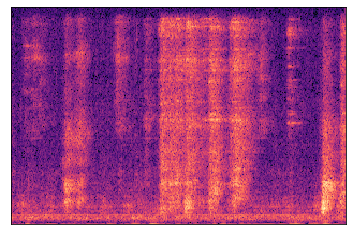

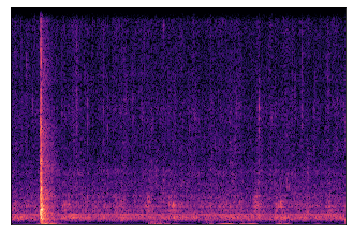

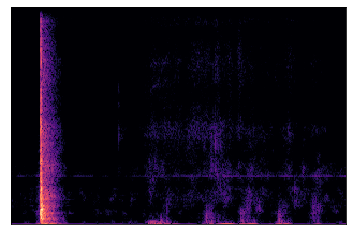

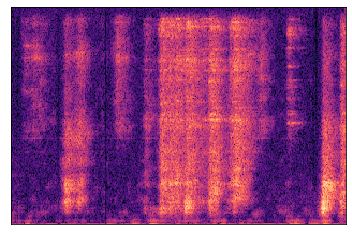

In [13]:
plt.subplots()
librosa.display.specshow(input_data_n[903],sr=16000)
plt.show()
librosa.display.specshow(input_data_n[1000],sr=16000)
plt.show()

librosa.display.specshow(input_data_c[1000],sr=16000)
plt.show()
librosa.display.specshow(input_data_c[901],sr=16000)
plt.show()

In [7]:
print(input_data_c.shape)
print(input_data_n.shape)

(7200, 258, 626)
(7200, 258, 626)


In [5]:
HDF5File("../numerical-data.hdf5").write(0, 0, 5)

ValueError: Unable to create dataset (name already exists)

In [5]:
#autoencoder = Autoencoder()
#autoencoder.compile(optimizer="adam", loss="mse")


2021-11-27 12:53:04.259940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-27 12:53:04.259961: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-27 12:53:04.259975: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2021-11-27 12:53:04.260131: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
